## I need to answer several questions. The answers to those questions must be supported by data and analytics. These are the questions:

### 1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
### 2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
### 3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
### 4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df_pluto = pd.read_csv('/kaggle/input/nyc-pluto/pluto_20v2.csv')
df= pd.read_csv('/kaggle/input/nyc-311-hpd-calls/311_Service_Requests_from_2010_to_Present.csv')
print('Shape of NYC 311 Dataframe is ',df.shape)
print('Shape of PLUTO Dataframe is ',df_pluto.shape)
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16,17,18,20,22,24,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12,13,14,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of NYC 311 Dataframe is  (6087779, 41)
Shape of PLUTO Dataframe is  (859038, 90)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45980284,04/10/2020 09:10:10 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10030.0,138 WEST 137 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815900,-73.941112,"(40.81590010208267, -73.9411124524788)"
1,45978285,04/10/2020 12:13:02 PM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11235.0,3105 BRIGHTON 3 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.576327,-73.964056,"(40.576327154021826, -73.9640562531078)"
2,45978263,04/10/2020 07:37:51 AM,04/10/2020 05:56:21 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10462.0,2040 BRONXDALE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.850795,-73.866537,"(40.850794587937656, -73.86653703997725)"
3,45976274,04/10/2020 01:53:42 PM,NaN,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10462.0,1435 DORIS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835502,-73.849272,"(40.835501747393344, -73.84927206222912)"
4,45980927,04/10/2020 11:20:50 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10458.0,2410 WASHINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858053,-73.890913,"(40.858052508996636, -73.8909130551251)"


In [3]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

# Data Wrangling

### Let's get rid of all the unnecessary fields

In [4]:
df_pluto=df_pluto[['address','bldgarea','bldgdepth','builtfar','commfar','facilfar','lot','lotarea',
                   'lotdepth','numbldgs','numfloors','officearea','resarea','residfar','retailarea',
                   'yearbuilt','yearalter1','zipcode','ycoord','xcoord']]

df=df[['Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name','Address Type',
       'City', 'Status', 'Due Date',
       'Resolution Description','Borough',
       'Latitude', 'Longitude']]


print('Shape of PLUTO dataframe is ',df_pluto.shape)
print('Shape of the NYC 311 call dataframe is', df.shape)

Shape of PLUTO dataframe is  (859038, 20)
Shape of the NYC 311 call dataframe is (6087779, 17)


In [5]:
df[['Address Type']].describe()

,Address Type
count,6003012
unique,1
top,ADDRESS
freq,6003012


### The field "Address Type" seems to have only one value. It's not useful information. We will LET IT GO

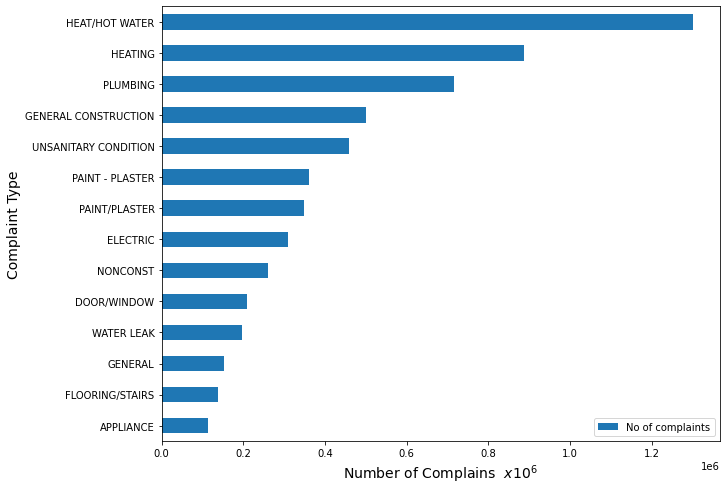

In [6]:
df=df.drop(columns=['Address Type'])
df_comp=df.groupby('Complaint Type')[["Unique Key"]].count()
df_comp=df_comp[df_comp['Unique Key']>80000].sort_values(by='Unique Key')
df_comp.columns=['No of complaints']


df_comp.plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of Complains  $x10^6$', fontsize=14)
plt.ylabel('Complaint Type',fontsize=14)
plt.show()

***It seems like the highest complaints are for HEAT or HOT WATER!!***

We are only going to focus on the most frequent occuring problems

In [7]:
print(df.shape)
df=df[df['Complaint Type'].isin(df_comp.index)]
print(df.shape)

(6087779, 16)
(5956198, 16)


Which borough had the largest number of complaints?

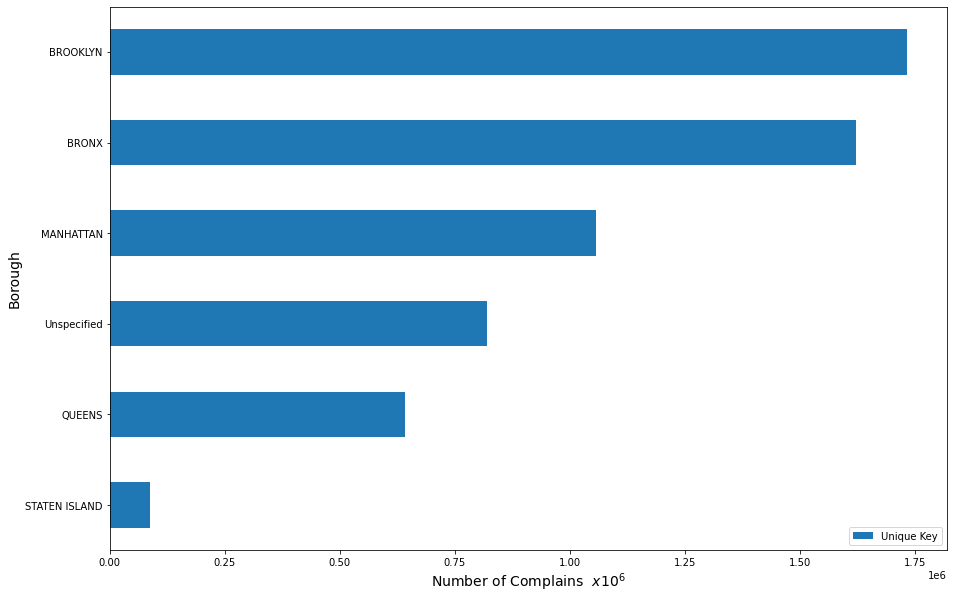

In [8]:
df_bor= df.groupby('Borough')[['Unique Key']].count().sort_values('Unique Key',ascending=True)
df_bor.plot(kind='barh',figsize=(15,10))
plt.xlabel('Number of Complains  $x10^6$', fontsize=14)
plt.ylabel('Borough',fontsize=14)
plt.show()

It seems like Brooklyn has the highest number of complaints. But BRONX is also very close. There are also a lot of entries with unspecified boroughs. We will have to find what borough those zip numbers belong to.

We are creating a dataframe that will have all the Zipcode towards the boroughs they were assigned to the most. That should be the correct borough for the zipcode

In [9]:
df_zip=df.groupby('Incident Zip')[['Borough']].agg(lambda x:x.value_counts().index[0])
df_zip.head()

,Borough
Incident Zip,
10001.0,MANHATTAN
10002.0,MANHATTAN
10003.0,MANHATTAN
10004.0,MANHATTAN
10005.0,MANHATTAN


We are going to replace the entries with unspecified boroughs with the borough their Zipcode belongs to. We are using df.at instead of df.loc because this is faster and finishes in a reasonable amount of time.

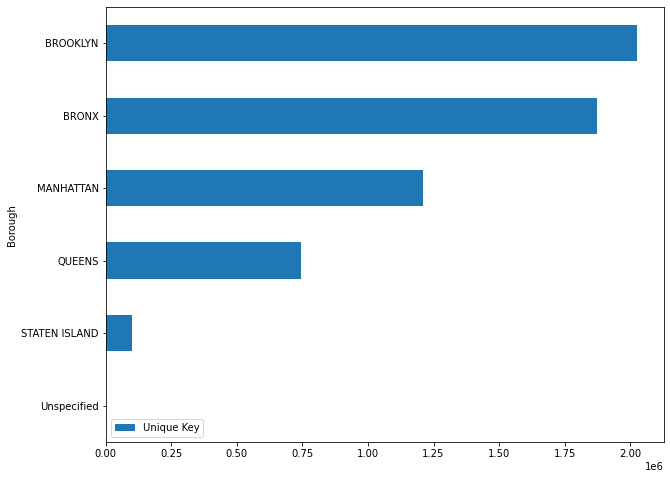

In [10]:
for i,j in zip(df[df['Borough']=='Unspecified'].index,df[df['Borough']=='Unspecified']['Incident Zip']):
    if np.isnan(j):
        continue
    df.at[i,'Borough']=df_zip.at[j,'Borough']
    #print(type(j))
    
df.groupby('Borough')[['Unique Key']].count().sort_values('Unique Key').plot(kind='barh',figsize=(10,8))

It seems like we have succesfully cleaned up the unspecified data.

### Let's see which address has the most complaints

In [11]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
print('Import Successfull')

Import Successfull


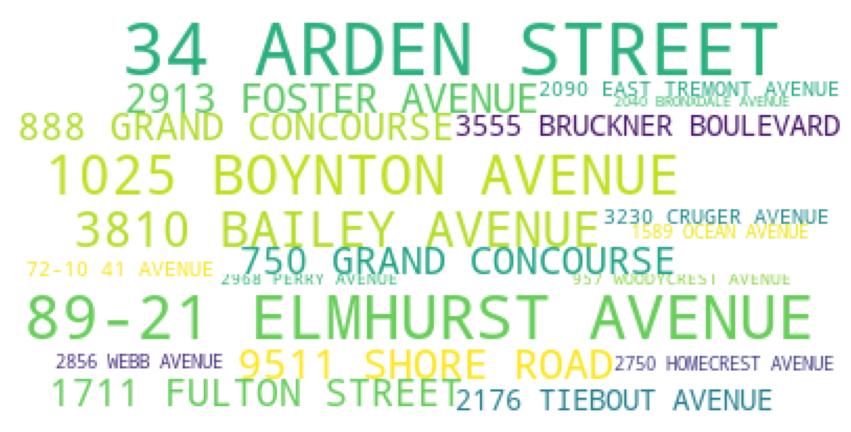

In [12]:
from collections import Counter

count_dict = Counter(df['Incident Address'])
stopwords= set(STOPWORDS)
wc = WordCloud(background_color='white', max_words=20, stopwords=stopwords).generate_from_frequencies(count_dict)
#unique_string = ("").join(list(df['Incident Address'].astype('str')))
#wc = WordCloud(background_color='white', max_words=20, stopwords=stopwords).generate(unique_string)


plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

This gives us a good idea about the address where are the highest numbers of complaints came from. To get which street has the maximum number of complaints, we will do a sorting.

In [13]:
df.groupby('Incident Address')[['Unique Key']].count().sort_values('Unique Key',ascending=False).head()

,Unique Key
Incident Address,
34 ARDEN STREET,14362
89-21 ELMHURST AVENUE,13343
1025 BOYNTON AVENUE,9729
3810 BAILEY AVENUE,7178
9511 SHORE ROAD,5539


Now Let's get the full address of this

In [14]:
df[df['Incident Address']=='34 ARDEN STREET'][['Incident Address','Incident Zip','Borough']].head(1)


,Incident Address,Incident Zip,Borough
472,34 ARDEN STREET,10040.0,MANHATTAN


 The address where most number of complaints came from is 34 ARDEN STREET, MANHATTAN 10040

In [15]:
df.groupby('Incident Zip')[['Unique Key']].count().sort_values('Unique Key',ascending=False).head()

,Unique Key
Incident Zip,
11226.0,215792
10467.0,174156
10458.0,169767
10453.0,162725
10468.0,148501


The zipcode where the most number of complaints came from is 11226

In [16]:
df.groupby('Status')[['Unique Key']].count().sort_values('Unique Key',ascending=False).head()

,Unique Key
Status,
Closed,5821801
Open,134395
Pending,2


In [17]:
df_pluto['bldgage']=2020-df_pluto['yearbuilt']
df_pluto.head()

,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,...,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode,ycoord,xcoord,bldgage
0,84-33 ABINGDON ROAD,2372.0,40.0,0.47,0.0,2.0,57,5000.0,100.00,2.0,...,0.0,2372.0,0.75,0.0,1920.0,0.0,11415.0,196855.0,1031306.0,100.0
1,107 WEST 68 STREET,22380.0,83.0,3.68,0.0,4.0,27,6075.0,100.42,1.0,...,0.0,22380.0,4.00,0.0,1930.0,1989.0,10023.0,221723.0,989505.0,90.0
2,CLAUDE AVENUE,0.0,0.0,0.00,0.0,1.0,43,2628.0,136.00,0.0,...,NaN,NaN,0.50,NaN,0.0,0.0,11433.0,191541.0,1043307.0,2020.0
3,FULTON STREET,0.0,0.0,0.00,0.0,4.2,4,2000.0,100.00,0.0,...,NaN,NaN,4.20,NaN,0.0,0.0,11233.0,186469.0,1006800.0,2020.0
4,10-12 GRASSMERE TERRACE,0.0,0.0,0.00,0.0,2.0,61,2771.0,102.03,0.0,...,NaN,NaN,0.75,NaN,0.0,0.0,11691.0,158883.0,1051634.0,2020.0


In [18]:
df[df['Complaint Type']=='HEAT/HOT WATER'].head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Due Date,Resolution Description,Borough,Latitude,Longitude
0,45980284,04/10/2020 09:10:10 AM,NaN,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10030.0,138 WEST 137 STREET,WEST 137 STREET,NEW YORK,Open,NaN,The following complaint conditions are still o...,MANHATTAN,40.815900,-73.941112
1,45978285,04/10/2020 12:13:02 PM,NaN,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11235.0,3105 BRIGHTON 3 STREET,BRIGHTON 3 STREET,BROOKLYN,Open,NaN,The following complaint conditions are still o...,BROOKLYN,40.576327,-73.964056
2,45978263,04/10/2020 07:37:51 AM,04/10/2020 05:56:21 PM,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,BRONX,Closed,NaN,The Department of Housing Preservation and Dev...,BRONX,40.850795,-73.866537
4,45980927,04/10/2020 11:20:50 AM,NaN,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10458.0,2410 WASHINGTON AVENUE,WASHINGTON AVENUE,BRONX,Open,NaN,The following complaint conditions are still o...,BRONX,40.858053,-73.890913
5,45976133,04/10/2020 11:22:47 AM,NaN,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10460.0,1562 THIERIOT AVENUE,THIERIOT AVENUE,BRONX,Open,NaN,The following complaint conditions are still o...,BRONX,40.839697,-73.865894


In [19]:
df_comp_count=df[df['Complaint Type']=='HEAT/HOT WATER'].groupby('Incident Address')[['Incident Address']].count()

In [20]:
df_comp_count.columns=['count of complaints']
df_comp_count['address']=df_comp_count.index
df_comp_count.head()

,count of complaints,address
Incident Address,,
1 1 AVENUE,2,1 1 AVENUE
1 43 STREET,1,1 43 STREET
1 7 AVENUE,2,1 7 AVENUE
1 74 STREET,24,1 74 STREET
1 ADRIAN AVENUE,134,1 ADRIAN AVENUE


In [21]:
#df_comp_count.index=None
df_comp_count.reset_index(drop=True,inplace=True)
df_comp_count.head()

,count of complaints,address
0,2,1 1 AVENUE
1,1,1 43 STREET
2,2,1 7 AVENUE
3,24,1 74 STREET
4,134,1 ADRIAN AVENUE


In [22]:
df_corr = pd.merge(df_comp_count,df_pluto,on='address', how='inner')
df_corr.head()

,count of complaints,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,...,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode,ycoord,xcoord,bldgage
0,2,1 7 AVENUE,15075.0,110.0,0.94,0.0,4.0,5,16050.0,96.25,...,0.0,0.0,4.00,15075.0,1900.0,0.0,11217.0,186061.0,991719.0,120.0
1,24,1 74 STREET,112140.0,294.0,3.36,0.0,3.0,1,33400.0,294.00,...,0.0,112140.0,3.00,0.0,1938.0,0.0,11209.0,170478.0,974216.0,82.0
2,134,1 ADRIAN AVENUE,32060.0,114.0,4.19,0.0,4.8,225,7650.0,106.92,...,0.0,32060.0,2.43,0.0,1924.0,0.0,10463.0,258449.0,1008393.0,96.0
3,1,1 ALBEMARLE ROAD,67200.0,182.0,0.99,0.0,2.0,32,68000.0,340.00,...,0.0,0.0,1.25,0.0,1930.0,2008.0,11218.0,174490.0,989656.0,90.0
4,2,1 AUDUBON AVENUE,40122.0,96.0,4.47,3.4,6.5,26,8978.0,99.75,...,0.0,34122.0,3.44,6000.0,1910.0,1989.0,10032.0,244875.0,1001061.0,110.0


In [23]:
#df_corr['alterage']= 2020-df_corr['yearalter1']
df_corr.drop(columns=['yearbuilt'],inplace=True)
df_corr.head()

,count of complaints,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,...,numfloors,officearea,resarea,residfar,retailarea,yearalter1,zipcode,ycoord,xcoord,bldgage
0,2,1 7 AVENUE,15075.0,110.0,0.94,0.0,4.0,5,16050.0,96.25,...,1.0,0.0,0.0,4.00,15075.0,0.0,11217.0,186061.0,991719.0,120.0
1,24,1 74 STREET,112140.0,294.0,3.36,0.0,3.0,1,33400.0,294.00,...,6.0,0.0,112140.0,3.00,0.0,0.0,11209.0,170478.0,974216.0,82.0
2,134,1 ADRIAN AVENUE,32060.0,114.0,4.19,0.0,4.8,225,7650.0,106.92,...,5.0,0.0,32060.0,2.43,0.0,0.0,10463.0,258449.0,1008393.0,96.0
3,1,1 ALBEMARLE ROAD,67200.0,182.0,0.99,0.0,2.0,32,68000.0,340.00,...,4.0,0.0,0.0,1.25,0.0,2008.0,11218.0,174490.0,989656.0,90.0
4,2,1 AUDUBON AVENUE,40122.0,96.0,4.47,3.4,6.5,26,8978.0,99.75,...,6.0,0.0,34122.0,3.44,6000.0,1989.0,10032.0,244875.0,1001061.0,110.0


In [24]:
data = df_corr.drop(columns=['address'])

null_data=data.isnull()

for i in null_data.columns:
    result=0
    for j in null_data[i]:
        if j: result+=1
    print(i," has ",result, " null values")




count of complaints  has  0  null values
bldgarea  has  1  null values
bldgdepth  has  27  null values
builtfar  has  36  null values
commfar  has  0  null values
facilfar  has  0  null values
lot  has  0  null values
lotarea  has  27  null values
lotdepth  has  27  null values
numbldgs  has  27  null values
numfloors  has  27  null values
officearea  has  639  null values
resarea  has  639  null values
residfar  has  0  null values
retailarea  has  639  null values
yearalter1  has  0  null values
zipcode  has  81  null values
ycoord  has  103  null values
xcoord  has  103  null values
bldgage  has  0  null values


We have a lot of null values. We have to deal with it before I try to do any machine learning on it. If we look carefully, they have a pattern of how many null values are in the columns. Maybe they have the null values for similar reason and we can replace the null values with similar approach.

In [25]:
print(df_pluto.shape)
print(df_corr.shape)
print(df_comp_count.shape)

(859038, 21)
(73315, 21)
(99189, 2)


In [26]:
pl_ana = df_corr.groupby('address')[['address']].count()
pl_ana.columns=['count']
pl_ana['address']=data_address.index
pl_ana.reset_index(drop=True, inplace=True)
pl_ana.sort_values('count',ascending=False)

NameError: name 'data_address' is not defined

In [27]:

data.sort_values('count of complaints',ascending=False)

,count of complaints,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,officearea,resarea,residfar,retailarea,yearalter1,zipcode,ycoord,xcoord,bldgage
1240,5225,61500.0,87.00,4.99,0.0,4.8,54,12319.0,100.00,1.0,6.0,0.0,61500.0,2.43,0.0,0.0,10472.0,239710.0,1018133.0,89.0
72034,5062,115672.0,0.00,3.81,0.0,4.0,7502,30380.0,0.00,1.0,6.0,0.0,109472.0,4.00,0.0,0.0,11209.0,163829.0,973758.0,63.0
42125,5033,58030.0,88.00,3.01,0.0,6.5,175,19250.0,130.00,1.0,5.0,0.0,58030.0,3.44,0.0,1983.0,10040.0,253253.0,1004335.0,100.0
28004,3231,53000.0,124.00,2.84,0.0,4.8,130,18633.0,124.00,1.0,6.0,0.0,48000.0,3.44,5000.0,0.0,10457.0,250617.0,1012426.0,93.0
63179,2891,128535.0,171.92,3.90,0.0,3.0,10,33000.0,198.00,1.0,6.0,0.0,117927.0,3.00,0.0,0.0,11377.0,210607.0,1013986.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53844,1,18200.0,91.00,2.76,0.0,4.8,25,6600.0,132.00,1.0,4.0,0.0,18200.0,2.43,0.0,0.0,11225.0,183177.0,997670.0,106.0
53843,1,16047.0,86.00,4.19,0.0,4.0,42,3831.0,102.17,1.0,6.0,0.0,14547.0,4.00,1500.0,1989.0,10075.0,220356.0,998332.0,110.0
33363,1,2700.0,45.00,1.35,0.0,4.8,59,2000.0,100.00,1.0,2.0,0.0,1800.0,2.43,0.0,0.0,11207.0,191261.0,1009588.0,100.0
53840,1,840.0,40.58,0.32,0.0,1.0,60,2593.0,103.36,1.0,2.0,0.0,840.0,0.50,0.0,0.0,11693.0,161963.0,1034662.0,100.0


#plt.figure(figsize=(10,8))
f, axes = plt.subplots(11,2,figsize=(8,30))
for i in range(len(data.columns)):
    sns.boxplot((data.iloc[:,i]),orient='vert',ax=axes[int(i/2),int(i%2)])
#sns.boxplot((data['bldgdepth']),color='g',orient='vert',ax=ax)
plt.show()

f, axes = plt.subplots(11,2,figsize=(10,40))
for i in range(len(data.columns)):
    sns.distplot(data.iloc[:,i],kde=False, ax=axes[int(i/2),int(i%2)])
#sns.boxplot((data['bldgdepth']),color='g',orient='vert',ax=ax)
plt.show()

sns.pairplot(data.T, size=2.5, corner=True)

In [28]:
for i in null_data.columns:
    result=0
    for k,j in enumerate(null_data[i]):
        if j: data.at[k,i]= data[i].mean()
            
            
null_data=data.isnull()
            
for i in null_data.columns:
    result=0
    for j in null_data[i]:
        if j: result+=1
    print(i," has ",result, " null values")

count of complaints  has  0  null values
bldgarea  has  0  null values
bldgdepth  has  0  null values
builtfar  has  0  null values
commfar  has  0  null values
facilfar  has  0  null values
lot  has  0  null values
lotarea  has  0  null values
lotdepth  has  0  null values
numbldgs  has  0  null values
numfloors  has  0  null values
officearea  has  0  null values
resarea  has  0  null values
residfar  has  0  null values
retailarea  has  0  null values
yearalter1  has  0  null values
zipcode  has  0  null values
ycoord  has  0  null values
xcoord  has  0  null values
bldgage  has  0  null values
